In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

from sklearn.preprocessing import MinMaxScaler



In [35]:
model = MinMaxScaler(feature_range=(0, 1))

In [36]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

X, y = data[:, 1:], data[:, 0]

In [37]:
X_mod = model.fit_transform(X)

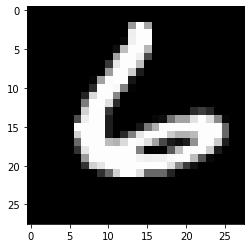

In [38]:
plt.imshow(X_mod[100].reshape(28, 28), cmap="gray")

In [39]:
X_mod.max()

1.0

In [79]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [92]:
model = Sequential()

model.add(Dense(units=100, activation="relu", input_shape=(784,)))
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=784, activation="relu"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_14 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_15 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_16 (Dense)             (None, 784)               79184     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(optimiser="adam", loss="mse")

In [94]:
model.fit(X_mod, X_mod, batch_size=200, epochs=20)

Train on 19999 samples
Epoch 1/20
19999/19999 [==============================] - 3s 135us/sample - loss: 0.0497
Epoch 2/20
19999/19999 [==============================] - 2s 98us/sample - loss: 0.0327
Epoch 3/20
19999/19999 [==============================] - 2s 87us/sample - loss: 0.0283
Epoch 4/20
19999/19999 [==============================] - 2s 84us/sample - loss: 0.0257
Epoch 5/20
19999/19999 [==============================] - 2s 87us/sample - loss: 0.0242
Epoch 6/20
19999/19999 [==============================] - 2s 89us/sample - loss: 0.0231
Epoch 7/20
19999/19999 [==============================] - 2s 90us/sample - loss: 0.0221
Epoch 8/20
19999/19999 [==============================] - 2s 94us/sample - loss: 0.0214
Epoch 9/20
19999/19999 [==============================] - 2s 108us/sample - loss: 0.0208
Epoch 10/20
19999/19999 [==============================] - 2s 93us/sample - loss: 0.0202
Epoch 11/20
19999/19999 [==============================] - 2s 97us/sample - loss: 0.0198
Epoch

In [95]:
gen = model.predict(X_mod[:10])

In [96]:
gen.shape

(10, 784)

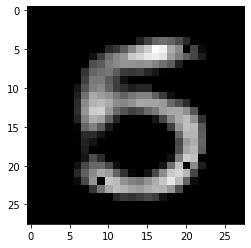

In [97]:
plt.imshow(gen[3].reshape(28, 28), cmap="gray")

In [98]:
model.layers

In [104]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [100]:
encoder = Model(model.input, model.layers[1].output)

In [101]:
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13_input (InputLayer)  [(None, 784)]             0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_14 (Dense)             (None, 30)                3030      
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________


In [105]:
decoder = Model(model.layers[2].input, model.layers[-1].output)

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: dense_14/Identity:0


ValueError: Graph disconnected: cannot obtain value for tensor Tensor("dense_13_input:0", shape=(None, 784), dtype=float32) at layer "dense_13_input". The following previous layers were accessed without issue: []